In [1]:
import pickle
with open('clean_data', 'rb') as f:
    raw_data = pickle.load(f)

In [2]:
years = raw_data['year']
artists = raw_data['artist']
features = raw_data['features']
print artists[1:10]
print years[1:10]

['AR7G5I41187FB4CE6C', 'AR7G5I41187FB4CE6C', 'ARXR32B1187FB57099', 'ARXR32B1187FB57099', 'AR8ZCNI1187B9A069B', 'ARIK43K1187B9AE54C', 'ARIK43K1187B9AE54C', 'ARIK43K1187B9AE54C', 'ARD842G1187B997376']
[1982, 1982, 2007, 2007, 1984, 1986, 1986, 1986, 1987]


In [3]:
import numpy as np

# Creates the arrays
X = np.stack(features)
X = np.transpose(X, (0,2,1))
print(X.shape)

y_artists = np.array(artists)
print y_artists.shape
print y_artists[0:5]

y_years = np.array(years)
print y_years.shape
print y_years[0:5]

order = np.argsort(y_artists)
X = X[order,...]
y_artists = y_artists[order,...]
y_years = y_years[order,...]

print y_artists[:50]

(9096, 200, 12)
(9096,)
['ARMJAGH1187FB546F3' 'AR7G5I41187FB4CE6C' 'AR7G5I41187FB4CE6C'
 'ARXR32B1187FB57099' 'ARXR32B1187FB57099']
(9096,)
[1969 1982 1982 2007 2007]
['AR00MBZ1187B9B5DB1' 'AR00MBZ1187B9B5DB1' 'AR00MBZ1187B9B5DB1'
 'AR01IP11187B9AF5D2' 'AR01IP11187B9AF5D2' 'AR01IP11187B9AF5D2'
 'AR01IP11187B9AF5D2' 'AR01IP11187B9AF5D2' 'AR01W2D1187FB5912F'
 'AR01W2D1187FB5912F' 'AR02IU11187FB513F2' 'AR02IU11187FB513F2'
 'AR02IU11187FB513F2' 'AR02IU11187FB513F2' 'AR02IU11187FB513F2'
 'AR02IU11187FB513F2' 'AR02IU11187FB513F2' 'AR02IU11187FB513F2'
 'AR02IU11187FB513F2' 'AR02IU11187FB513F2' 'AR02IU11187FB513F2'
 'AR02IU11187FB513F2' 'AR02IU11187FB513F2' 'AR02KZG1187FB3B3B4'
 'AR02KZG1187FB3B3B4' 'AR02KZG1187FB3B3B4' 'AR02KZG1187FB3B3B4'
 'AR02KZG1187FB3B3B4' 'AR02YGA1187B9B8AC4' 'AR02YGA1187B9B8AC4'
 'AR02YGA1187B9B8AC4' 'AR02YGA1187B9B8AC4' 'AR02YGA1187B9B8AC4'
 'AR02YGA1187B9B8AC4' 'AR02YGA1187B9B8AC4' 'AR02YGA1187B9B8AC4'
 'AR02YGA1187B9B8AC4' 'AR035N21187FB3938E' 'AR035N21187FB3938E'
 

In [4]:
TEST_RATIO = .1

n_train = X.shape[0] * (1-TEST_RATIO)
n_train = int(n_train)

X_train = X[:n_train]
X_test =  X[n_train:]

y_train = y_years[:n_train]
y_test =  y_years[n_train:]

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(8186, 200, 12) (8186,)
(910, 200, 12) (910,)


In [5]:
%load_ext rpy2.ipython

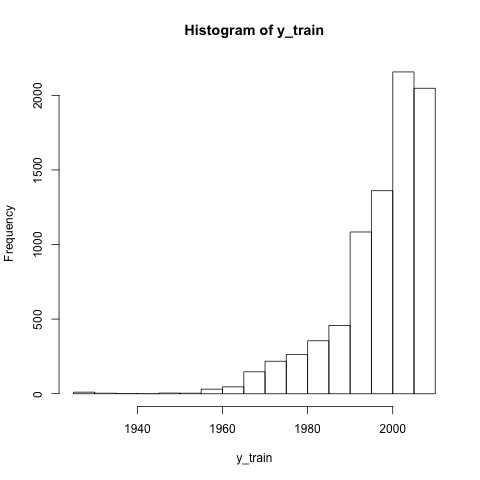

In [6]:
%%R -i y_train
hist(y_train)

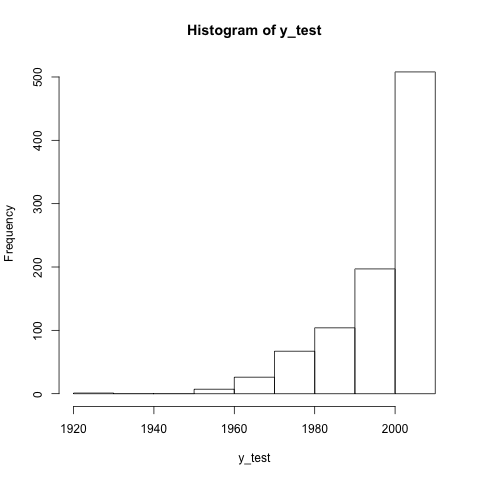

In [7]:
%%R -i y_test
hist(y_test)

# Training 1: plain stupid regression

In [8]:
flat_X_train = np.mean(X_train, axis=1)
flat_X_test  = np.mean(X_test,  axis=1)

print flat_X_train.shape, flat_X_test.shape

(8186, 12) (910, 12)


In [9]:
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(flat_X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [10]:
print 'R^2:', reg.score(flat_X_test, y_test)

t = reg.predict(flat_X_test)
sl = np.sum((t - y_test)**2)
print 'Squared loss',sl
print 'RMSE', np.sqrt(sl)
print 'Average error', np.mean(np.abs(t - y_test))
print('*****')
print('*****')
for i in range(25):
    print t[i], y_train[i]

R^2: 0.199780325452
Squared loss 100505.833278
RMSE 317.0265498
Average error 7.93224941011
*****
*****
2000.06932379 1995
1999.29038116 1997
1999.80902808 1991
1995.33908219 2008
1999.8392717 2008
1997.78226852 2008
1999.82310699 2006
1999.06954812 2006
1999.14111729 2008
1999.8880894 2008
1997.54349254 1972
1996.87818873 1972
1999.45155362 1993
2001.21728469 1998
1997.44622364 1993
1999.67099285 1993
1999.46813548 1998
1990.11201451 1998
2004.50243501 1987
1996.60862501 1987
2004.86286121 1987
2003.02925529 1998
1994.17319452 1993
1994.27891521 2003
1993.84333564 2003


# Fancier regression

In [11]:
flat_X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
flat_X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print flat_X_train.shape, flat_X_test.shape
print y_train.shape, y_test.shape

(8186, 2400) (910, 2400)
(8186,) (910,)


In [12]:
from sklearn import linear_model
reg2 = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg2.fit(flat_X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [13]:
print 'R^2:', reg2.score(flat_X_test, y_test)

t = reg2.predict(flat_X_test)
sl = np.sum((t - y_test)**2)
print 'Squared loss',sl
print 'RMSE', np.sqrt(sl)
print 'Average error', np.mean(np.abs(t - y_test))
print('*****')
print('*****')
for i in range(25):
    print t[i], y_train[i]

R^2: -0.156739065808
Squared loss 145283.885653
RMSE 381.161233145
Average error 9.62914901213
*****
*****
1994.26893543 1995
2004.32458996 1997
1997.72187624 1991
1988.35271891 2008
1983.5189163 2008
1999.19569924 2008
2010.48593728 2006
2001.18502431 2006
1999.98923624 2008
1992.29957257 2008
1993.71898147 1972
2001.78826938 1972
1996.7891817 1993
1997.02093411 1998
1999.20505878 1993
1998.89708353 1993
1985.2176006 1998
1983.43620084 1998
2002.14536179 1987
1991.891566 1987
2003.64626643 1987
1996.02120472 1998
1998.12168245 1993
1994.60284193 2003
1992.71130919 2003


# Training 2: MLP

In [14]:
flat_X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
flat_X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
print flat_X_train.shape, flat_X_test.shape
print y_train.shape, y_test.shape

(8186, 2400) (910, 2400)
(8186,) (910,)


In [20]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
print flat_X_train.shape[1]

y_mean = np.mean(y_train)
y_sd = np.std(y_train)

y_train_norm = (y_train - y_mean) / y_sd
y_test_norm = (y_test - y_mean) / y_sd

for N_UNITS in [8,16,32,64,128,256]:
    print '*************', N_UNITS, '*************'
    model = None
    model = Sequential()
    model.add(Dense(N_UNITS, input_dim=2400))
    model.add(Activation('relu'))
    model.add(Dense(1))
    
    print model.layers

    model.compile(optimizer='rmsprop', loss='mse')
    model.fit(flat_X_train, y_train_norm, epochs=160, batch_size=32, verbose=1)
    
    score = model.evaluate(flat_X_test, y_test_norm, batch_size=128)
    print score
    
    t_norm = model.predict(flat_X_test)
    t = t_norm * y_sd + y_mean
    sl = np.sum((t - y_test)**2)
    
    print 'Squared loss',sl
    print 'RMSE', np.sqrt(sl)
    print 'Average error', np.mean(np.abs(t - y_test))
    print('*****')
    for i in range(15):
        print t[i], y_train[i]

2400
************* 8 *************
[<keras.layers.core.Dense object at 0x129ec05d0>, <keras.layers.core.Activation object at 0x129ed3990>, <keras.layers.core.Dense object at 0x129ed3850>]
Epoch 1/160
8186/8186 [==============================] - 2s - loss: 24.7944     
Epoch 2/160
8186/8186 [==============================] - 0s - loss: 1.2757     
Epoch 3/160
8186/8186 [==============================] - 0s - loss: 1.0256     
Epoch 4/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 5/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 6/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 7/160
8186/8186 [==============================] - 0s - loss: 1.0000     
Epoch 8/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 9/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 10/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 11/1

8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 100/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 101/160
8186/8186 [==============================] - 0s - loss: 1.0001     
Epoch 102/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 103/160
8186/8186 [==============================] - 0s - loss: 1.0001     
Epoch 104/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 105/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 106/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 107/160
8186/8186 [==============================] - 0s - loss: 1.0001     
Epoch 108/160
8186/8186 [==============================] - 0s - loss: 1.0001     
Epoch 109/160
8186/8186 [==============================] - 0s - loss: 1.0002     
Epoch 110/160
8186/8186 [==============================] - 0s - loss: 1.0000     
Epoch 111/160
8186/8186 [=====

8186/8186 [==============================] - 0s - loss: 0.6015     
Epoch 32/160
8186/8186 [==============================] - 0s - loss: 0.6049     
Epoch 33/160
8186/8186 [==============================] - 0s - loss: 0.6003     
Epoch 34/160
8186/8186 [==============================] - 0s - loss: 0.6001     
Epoch 35/160
8186/8186 [==============================] - 0s - loss: 0.5986     
Epoch 36/160
8186/8186 [==============================] - 0s - loss: 0.5961     
Epoch 37/160
8186/8186 [==============================] - 0s - loss: 0.5971     
Epoch 38/160
8186/8186 [==============================] - 0s - loss: 0.5930     
Epoch 39/160
8186/8186 [==============================] - 0s - loss: 0.5874     
Epoch 40/160
8186/8186 [==============================] - 0s - loss: 0.5888     
Epoch 41/160
8186/8186 [==============================] - 0s - loss: 0.5864     
Epoch 42/160
8186/8186 [==============================] - 0s - loss: 0.5853     
Epoch 43/160
8186/8186 [=================

8186/8186 [==============================] - 0s - loss: 0.5390     
Epoch 132/160
8186/8186 [==============================] - 0s - loss: 0.5393     
Epoch 133/160
8186/8186 [==============================] - 0s - loss: 0.5393     
Epoch 134/160
8186/8186 [==============================] - 0s - loss: 0.5391     
Epoch 135/160
8186/8186 [==============================] - 0s - loss: 0.5378     
Epoch 136/160
8186/8186 [==============================] - 0s - loss: 0.5393     
Epoch 137/160
8186/8186 [==============================] - 0s - loss: 0.5380     
Epoch 138/160
8186/8186 [==============================] - 0s - loss: 0.5377     
Epoch 139/160
8186/8186 [==============================] - 0s - loss: 0.5383     
Epoch 140/160
8186/8186 [==============================] - 0s - loss: 0.5367     
Epoch 141/160
8186/8186 [==============================] - 0s - loss: 0.5373     
Epoch 142/160
8186/8186 [==============================] - 0s - loss: 0.5362     
Epoch 143/160
8186/8186 [=====

8186/8186 [==============================] - 0s - loss: 0.5125     
Epoch 64/160
8186/8186 [==============================] - 0s - loss: 0.5072     
Epoch 65/160
8186/8186 [==============================] - 0s - loss: 0.5134     
Epoch 66/160
8186/8186 [==============================] - 0s - loss: 0.5100     
Epoch 67/160
8186/8186 [==============================] - 0s - loss: 0.5067     
Epoch 68/160
8186/8186 [==============================] - 0s - loss: 0.5125     
Epoch 69/160
8186/8186 [==============================] - 0s - loss: 0.5072     
Epoch 70/160
8186/8186 [==============================] - 0s - loss: 0.5064     
Epoch 71/160
8186/8186 [==============================] - 0s - loss: 0.5080     
Epoch 72/160
8186/8186 [==============================] - 0s - loss: 0.5049     
Epoch 73/160
8186/8186 [==============================] - 0s - loss: 0.5040     
Epoch 74/160
8186/8186 [==============================] - 0s - loss: 0.5061     
Epoch 75/160
8186/8186 [=================

Epoch 1/160
8186/8186 [==============================] - 1s - loss: 265.5228     
Epoch 2/160
8186/8186 [==============================] - 0s - loss: 4.7741     
Epoch 3/160
8186/8186 [==============================] - 0s - loss: 1.7767     
Epoch 4/160
8186/8186 [==============================] - 0s - loss: 1.0552     
Epoch 5/160
8186/8186 [==============================] - 0s - loss: 0.9537     
Epoch 6/160
8186/8186 [==============================] - 0s - loss: 0.9215     
Epoch 7/160
8186/8186 [==============================] - 0s - loss: 0.8911     
Epoch 8/160
8186/8186 [==============================] - 0s - loss: 0.8459     
Epoch 9/160
8186/8186 [==============================] - 0s - loss: 0.8251     
Epoch 10/160
8186/8186 [==============================] - 0s - loss: 0.8037     
Epoch 11/160
8186/8186 [==============================] - 0s - loss: 0.7758     
Epoch 12/160
8186/8186 [==============================] - 0s - loss: 0.7586     
Epoch 13/160
8186/8186 [===========

8186/8186 [==============================] - 0s - loss: 0.5185     
Epoch 103/160
8186/8186 [==============================] - 0s - loss: 0.5151     
Epoch 104/160
8186/8186 [==============================] - 0s - loss: 0.5219     
Epoch 105/160
8186/8186 [==============================] - 0s - loss: 0.5148     
Epoch 106/160
8186/8186 [==============================] - 0s - loss: 0.5230     
Epoch 107/160
8186/8186 [==============================] - 0s - loss: 0.5161     
Epoch 108/160
8186/8186 [==============================] - 0s - loss: 0.5162     
Epoch 109/160
8186/8186 [==============================] - 0s - loss: 0.5233     
Epoch 110/160
8186/8186 [==============================] - 0s - loss: 0.5148     
Epoch 111/160
8186/8186 [==============================] - 0s - loss: 0.5180     
Epoch 112/160
8186/8186 [==============================] - 0s - loss: 0.5152     
Epoch 113/160
8186/8186 [==============================] - 0s - loss: 0.5148     
Epoch 114/160
8186/8186 [=====

8186/8186 [==============================] - 1s - loss: 0.5632     
Epoch 35/160
8186/8186 [==============================] - 1s - loss: 0.5623     
Epoch 36/160
8186/8186 [==============================] - 1s - loss: 0.5512     
Epoch 37/160
8186/8186 [==============================] - 1s - loss: 0.5500     
Epoch 38/160
8186/8186 [==============================] - 1s - loss: 0.5477     
Epoch 39/160
8186/8186 [==============================] - 1s - loss: 0.5458     
Epoch 40/160
8186/8186 [==============================] - 1s - loss: 0.5531     
Epoch 41/160
8186/8186 [==============================] - 1s - loss: 0.5539     
Epoch 42/160
8186/8186 [==============================] - 1s - loss: 0.5428     
Epoch 43/160
8186/8186 [==============================] - 1s - loss: 0.5381     
Epoch 44/160
8186/8186 [==============================] - 1s - loss: 0.5408     
Epoch 45/160
8186/8186 [==============================] - 1s - loss: 0.5408     
Epoch 46/160
8186/8186 [=================

8186/8186 [==============================] - 1s - loss: 0.4834     
Epoch 135/160
8186/8186 [==============================] - 1s - loss: 0.4801     
Epoch 136/160
8186/8186 [==============================] - 1s - loss: 0.4807     
Epoch 137/160
8186/8186 [==============================] - 1s - loss: 0.4816     
Epoch 138/160
8186/8186 [==============================] - 1s - loss: 0.4805     
Epoch 139/160
8186/8186 [==============================] - 1s - loss: 0.4819     
Epoch 140/160
8186/8186 [==============================] - 1s - loss: 0.4815     
Epoch 141/160
8186/8186 [==============================] - 1s - loss: 0.4847     
Epoch 142/160
8186/8186 [==============================] - 1s - loss: 0.4828     
Epoch 143/160
8186/8186 [==============================] - 1s - loss: 0.4819     
Epoch 144/160
8186/8186 [==============================] - 1s - loss: 0.4843     
Epoch 145/160
8186/8186 [==============================] - 1s - loss: 0.4806     
Epoch 146/160
8186/8186 [=====

8186/8186 [==============================] - 2s - loss: 0.3932     
Epoch 67/160
8186/8186 [==============================] - 2s - loss: 0.3926     
Epoch 68/160
8186/8186 [==============================] - 2s - loss: 0.3978     
Epoch 69/160
8186/8186 [==============================] - 2s - loss: 0.3940     
Epoch 70/160
8186/8186 [==============================] - 2s - loss: 0.3943     
Epoch 71/160
8186/8186 [==============================] - 2s - loss: 0.3884     
Epoch 72/160
8186/8186 [==============================] - 2s - loss: 0.3876     
Epoch 73/160
8186/8186 [==============================] - 2s - loss: 0.3864     
Epoch 74/160
8186/8186 [==============================] - 2s - loss: 0.3857     
Epoch 75/160
8186/8186 [==============================] - 2s - loss: 0.3831     
Epoch 76/160
8186/8186 [==============================] - 2s - loss: 0.3867     
Epoch 77/160
8186/8186 [==============================] - 2s - loss: 0.3849     
Epoch 78/160
8186/8186 [=================

# Training 3: LSTM

In [21]:
import keras

from keras.models import Sequential
from keras.layers import Dense, LSTM
print flat_X_train.shape[1]

y_mean = np.mean(y_train)
y_sd = np.std(y_train)

y_train_norm = (y_train - y_mean) / y_sd
y_test_norm = (y_test - y_mean) / y_sd

for N_UNITS in [8, 16]:
    print '*************', N_UNITS, '*************'
    model = Sequential()
    model.add(LSTM(N_UNITS, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    
    print model.layers

    model.compile(optimizer='rmsprop', loss='mse')
    model.fit(X_train, y_train_norm, epochs=50, batch_size=32, verbose=1)
    
    score = model.evaluate(X_test, y_test_norm, batch_size=128)
    print score
    
    t_norm = model.predict(X_test)
    t = t_norm * y_sd + y_mean
    sl = np.sum((t - y_test)**2)
    
    print 'Squared loss',sl
    print 'RMSE', np.sqrt(sl)
    print 'Average error', np.mean(np.abs(t - y_test))
    print('*****')
    for i in range(15):
        print t[i], y_train[i]

2400
************* 8 *************
[<keras.layers.recurrent.LSTM object at 0x12b14e950>, <keras.layers.core.Dense object at 0x12b14ec50>]
Epoch 1/50
8186/8186 [==============================] - 144s - loss: 1.0760   
Epoch 2/50
8186/8186 [==============================] - 142s - loss: 0.9955   
Epoch 3/50
8186/8186 [==============================] - 142s - loss: 0.9699   
Epoch 4/50
8186/8186 [==============================] - 142s - loss: 0.9544   
Epoch 5/50
8186/8186 [==============================] - 142s - loss: 0.9451   
Epoch 6/50
8186/8186 [==============================] - 142s - loss: 0.9395   
Epoch 7/50
8186/8186 [==============================] - 142s - loss: 0.9371   
Epoch 8/50
8186/8186 [==============================] - 142s - loss: 0.9321   
Epoch 9/50
8186/8186 [==============================] - 142s - loss: 0.9271   
Epoch 10/50
8186/8186 [==============================] - 142s - loss: 0.9248   
Epoch 11/50
8186/8186 [==============================] - 142s - loss: 0

8186/8186 [==============================] - 144s - loss: 0.7990   
Epoch 45/50
8186/8186 [==============================] - 143s - loss: 0.7948   
Epoch 46/50
8186/8186 [==============================] - 143s - loss: 0.7918   
Epoch 47/50
8186/8186 [==============================] - 144s - loss: 0.7956   
Epoch 48/50
8186/8186 [==============================] - 144s - loss: 0.7930   
Epoch 49/50
8186/8186 [==============================] - 144s - loss: 0.7900   
Epoch 50/50
910/910 [==============================] - 1s     
1.11248284775
Squared loss 137268923.36
RMSE 11716.1821153
Average error 9.94535016004
*****
[ 1997.76928711] 1995
[ 2000.78137207] 1997
[ 2000.98095703] 1991
[ 1994.3458252] 2008
[ 1995.7442627] 2008
[ 1999.4498291] 2008
[ 2002.15356445] 2006
[ 1997.6854248] 2006
[ 1994.23388672] 2008
[ 1991.93444824] 2008
[ 1985.6940918] 1972
[ 1998.30627441] 1972
[ 1991.91748047] 1993
[ 1991.87097168] 1998
[ 2004.77087402] 1993


# Training 4: Convolution

In [17]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
print flat_X_train.shape[1]

y_mean = np.mean(y_train)
y_sd = np.std(y_train)

y_train_norm = (y_train - y_mean) / y_sd
y_test_norm = (y_test - y_mean) / y_sd

for N_UNITS in [8, 16, 32, 64, 128]:
    print '*************', N_UNITS, '*************'
    model = Sequential()
    model.add(Conv1D(N_UNITS, 4, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(1))
    
    for layer in model.layers:
        print layer.output_shape

    model.compile(optimizer='rmsprop', loss='mse')
    model.fit(X_train, y_train_norm, epochs=50, batch_size=32, verbose=1)
    
    score = model.evaluate(X_test, y_test_norm, batch_size=128)
    print score
    
    t_norm = model.predict(X_test)
    t = t_norm * y_sd + y_mean
    sl = np.sum((t - y_test)**2)
    
    print 'Squared loss',sl
    print 'RMSE', np.sqrt(sl)
    print 'Average error', np.mean(np.abs(t - y_test))
    print('*****')
    for i in range(15):
        print t[i], y_train[i]

2400
************* 8 *************
(None, 197, 8)
(None, 8)
(None, 1)
Epoch 1/50
8186/8186 [==============================] - 1s - loss: 1.4732     
Epoch 2/50
8186/8186 [==============================] - 1s - loss: 1.3566     
Epoch 3/50
8186/8186 [==============================] - 1s - loss: 1.2692     
Epoch 4/50
8186/8186 [==============================] - 1s - loss: 1.2673     
Epoch 5/50
8186/8186 [==============================] - 1s - loss: 1.2304     
Epoch 6/50
8186/8186 [==============================] - 1s - loss: 1.1870     
Epoch 7/50
8186/8186 [==============================] - 1s - loss: 1.1820     
Epoch 8/50
8186/8186 [==============================] - 1s - loss: 1.1639     
Epoch 9/50
8186/8186 [==============================] - 1s - loss: 1.1438     
Epoch 10/50
8186/8186 [==============================] - 1s - loss: 1.0869     
Epoch 11/50
8186/8186 [==============================] - 1s - loss: 1.1151     
Epoch 12/50
8186/8186 [==============================] - 1s

8186/8186 [==============================] - 1s - loss: 0.8959     
Epoch 47/50
8186/8186 [==============================] - 1s - loss: 0.8960     
Epoch 48/50
8186/8186 [==============================] - 1s - loss: 0.8956     
Epoch 49/50
8186/8186 [==============================] - 1s - loss: 0.8946     
Epoch 50/50
128/910 [===>..........................] - ETA: 2s0.984922089682
Squared loss 122192867.8
RMSE 11054.0882844
Average error 9.36271194419
*****
[ 1998.77246094] 1995
[ 1997.7623291] 1997
[ 1999.03869629] 1991
[ 1995.37780762] 2008
[ 1998.95629883] 2008
[ 1998.02587891] 2008
[ 1998.58178711] 2006
[ 1998.50061035] 2006
[ 1998.17797852] 2008
[ 1997.37280273] 2008
[ 1994.73168945] 1972
[ 1996.11877441] 1972
[ 1997.62072754] 1993
[ 1998.71582031] 1998
[ 1997.84692383] 1993
************* 32 *************
(None, 197, 32)
(None, 32)
(None, 1)
Epoch 1/50
8186/8186 [==============================] - 2s - loss: 3.4126     
Epoch 2/50
8186/8186 [==============================] - 2s - 

8186/8186 [==============================] - 2s - loss: 0.9161     
Epoch 35/50
8186/8186 [==============================] - 2s - loss: 0.9133     
Epoch 36/50
8186/8186 [==============================] - 2s - loss: 0.9114     
Epoch 37/50
8186/8186 [==============================] - 2s - loss: 0.9098     
Epoch 38/50
8186/8186 [==============================] - 2s - loss: 0.9053     
Epoch 39/50
8186/8186 [==============================] - 2s - loss: 0.9061     
Epoch 40/50
8186/8186 [==============================] - 2s - loss: 0.9059     
Epoch 41/50
8186/8186 [==============================] - 2s - loss: 0.9073     
Epoch 42/50
8186/8186 [==============================] - 2s - loss: 0.9039     
Epoch 43/50
8186/8186 [==============================] - 2s - loss: 0.9048     
Epoch 44/50
8186/8186 [==============================] - 2s - loss: 0.9051     
Epoch 45/50
8186/8186 [==============================] - 2s - loss: 0.9016     
Epoch 46/50
8186/8186 [=============================